<a href="https://colab.research.google.com/github/solisa986/cmpsc310-ai/blob/main/CMPSC_310_Activity8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Activity 8: Classification Example**

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np

Importing the required functions and specifying the specific version that it needs to be

MNIST dataset contains images of handritten notes from high school students and employees of the census bureau

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

fetching the sklearn dataset using the 'fetch_openml' function with the frame as False as we want it to be returned as a numpy array instead of a pandas dataframe

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

Assigning the data and target columns to x and y. The shape is 70000,784 which means there are 70,000 entries and 784 features -> each feature represents each pixels intensity (since we are talking about pictures)

In [4]:
y.shape

(70000,)

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

This shows the first couple of values of the y value and also the data type of the y values

In [7]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

This shows the 2D array for the x values

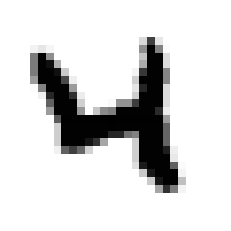

In [8]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[20]
plot_digit(some_digit)
plt.show()

We use matplotlib to be able to see the plot. the first few lines are setting up the graph. Then we set some_digit equal to one image in the x dataset in the plot that was configured

In [9]:
y[20]

'4'

In [10]:
y = y.astype(np.uint8)

We are casting a specific type of integer to the target value (y)

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

This is how we split up the data for training and testing through cross-validation (training through different sections of your data)

In [12]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

stochastic gradient descent classifier from sklearn. the fit function is for training the data, predict function is for testing the data

In [14]:
sgd_clf.predict([some_digit])

array([False])

This determines whether the preset number (in this case 5) matches with what the machine classifies as a 5. In this case the number 4 does not match the number 5

## Performance Measures

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

sklearn allows us to calculate the accuracy of the different parts of the model -> uses k-fold (number of splits of the data) through 'cv', so we are splitting it up by 3

In [17]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

run the cross val predict function but we return the prediction for each test fold

In [18]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

false positive is known as a type 1 error, false negative is referred to as a type 2 error

In [ ]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846